In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
reviews = pd.read_csv('archivos_csv/reviews_sentiment_analysis.csv')

**Creo un dataframe que tiene la cantidad de reviews y el promedio de recomendación y analisis de sentimiento**

In [3]:
mean_reviews = reviews.groupby('item_id')[['recommend', 'sentiment_analysis']].mean()

In [5]:
mean_reviews.head()

,recommend,sentiment_analysis
item_id,,
10,0.980000,1.120000
20,0.666667,1.133333
30,0.750000,1.000000
40,1.000000,1.000000
50,0.750000,1.000000


In [62]:
mean_reviews.recommend.mean() #promedio de recomendación (0 es no recomendado y 1 es recomendado)

0.8139722233288543

**se ve que la mayoría de las reviews recomiendan el juego, podría haber cierto sesgo que se hacen reviews principalmente los juegos que gustaron**

In [63]:
mean_reviews.sentiment_analysis.mean() #promedio de análisis de sentimiento (entre 0 y 2)

1.0308694334839512

**En promedio la mayoría de las reviews tiene una puntuación de neutral, según el algoritmo**

**Dataframa contiene la cantidad de reviews por item**

In [6]:
reviews_count = reviews.groupby('item_id').size().reset_index(name='count')
reviews_count.head(5)

,item_id,count
0,10,50
1,20,15
2,30,4
3,40,1
4,50,4


**Los mergeamos**

In [7]:
merged_df = pd.merge(reviews_count, mean_reviews, on='item_id')
merged_df.head()

,item_id,count,recommend,sentiment_analysis
0,10,50,0.980000,1.120000
1,20,15,0.666667,1.133333
2,30,4,0.750000,1.000000
3,40,1,1.000000,1.000000
4,50,4,0.750000,1.000000


In [24]:
games = pd.read_csv("archivos_csv/games_final.csv")

In [25]:
import ast

In [26]:
## convierto la columna tags a una lista para poder usarla
games.tags = games.tags.apply(lambda x: ast.literal_eval(x)) #ast.literal_eval transforma el string a una lista.

In [195]:
games.tags.iloc[0]

['Strategy', 'Action', 'Indie', 'Casual', 'Simulation']

**Creo una lista con todas las tags de juegos**

In [27]:
tags = []
for list in games.tags:
    for element in list:
        if element not in tags:
            tags.append(element)

In [28]:
len(tags)

339

**Voy a realizar un Onehot Encoding para los tags. Creo una columna para tag, la inicializo a 0 para todas las filas**

In [29]:
for tag in tags:
    games[tag]= 0

C:\Users\torin\AppData\Local\Temp\ipykernel_20396\1952821321.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  games[tag]= 0
C:\Users\torin\AppData\Local\Temp\ipykernel_20396\1952821321.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  games[tag]= 0
C:\Users\torin\AppData\Local\Temp\ipykernel_20396\1952821321.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) inste

**Itera por fila y completa con 1 (True) las columnas tags a partir de sus tags**

In [30]:
for i, row in games.iterrows():
    tags_in_row = row['tags']
    for tag in tags_in_row:
        games.at[i, tag] = 1

In [31]:
games.head()

,app_name,release_date,tags,id,Strategy,Action,Indie,Casual,Simulation,Free to Play,...,Foreign,Feature Film,Hardware,Steam Machine,Philisophical,Mystery Dungeon,Wrestling,360 Video,Faith,Bikes
0,Lost Summoner Kitty,2018.0,"[Strategy, Action, Indie, Casual, Simulation]",761140.0,1,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
1,Ironbound,2018.0,"[Free to Play, Strategy, Indie, RPG, Card Game...",643980.0,1,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,Real Pool 3D - Poolians,2017.0,"[Free to Play, Simulation, Sports, Casual, Ind...",670290.0,0,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
3,弹炸人2222,2017.0,"[Action, Adventure, Casual]",767400.0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Log Challenge,NaN,"[Action, Indie, Casual, Sports]",773570.0,0,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0


**Dropeo la columna tags que ya no la necesito**

In [32]:
games.drop(columns='tags', inplace=True)

In [33]:
games[tags].mean()

Strategy           0.236652
Action             0.406744
Indie              0.551093
Casual             0.304620
Simulation         0.241782
                     ...   
Mystery Dungeon    0.000438
Wrestling          0.000250
360 Video          0.000751
Faith              0.000125
Bikes              0.000063
Length: 339, dtype: float64

**Como se ve son demasiadas dimensiones, entonces me voy a quedar con los tags que aparecen en más del 1% de los juegos. Ya que son los que más nos pueden servir para encontrar similitudes entre juegos.**

In [34]:
common_tags_mask = games[tags].mean() > 0.01
common_tags = common_tags_mask[common_tags_mask].index
games_filtered = games[['app_name', 'release_date', 'id'] + common_tags.tolist()]

In [35]:
games_filtered.head()

,app_name,release_date,id,Strategy,Action,Indie,Casual,Simulation,Free to Play,RPG,...,Local Multiplayer,Short,Tower Defense,Memes,Shoot 'Em Up,Visual Novel,Movie,Rogue-like,RPGMaker,Utilities
0,Lost Summoner Kitty,2018.0,761140.0,1,1,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Ironbound,2018.0,643980.0,1,0,1,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
2,Real Pool 3D - Poolians,2017.0,670290.0,0,0,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
3,弹炸人2222,2017.0,767400.0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Log Challenge,NaN,773570.0,0,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


**Quedaron 85 etiquetas**

**Como se distribuyen estás etiquetas**

In [36]:
tag_stats = games_filtered[common_tags.tolist()].describe()

tag_stats.T.sort_values(by='mean', ascending=False)

,count,mean,std,min,25%,50%,75%,max
Indie,31971.0,0.551093,0.497390,0.0,0.0,1.0,1.0,1.0
Action,31971.0,0.406744,0.491234,0.0,0.0,0.0,1.0,1.0
Adventure,31971.0,0.307497,0.461464,0.0,0.0,0.0,1.0,1.0
Casual,31971.0,0.304620,0.460253,0.0,0.0,0.0,1.0,1.0
Simulation,31971.0,0.241782,0.428169,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...
Tower Defense,31971.0,0.010791,0.103319,0.0,0.0,0.0,0.0,1.0
Action RPG,31971.0,0.010541,0.102127,0.0,0.0,0.0,0.0,1.0
Management,31971.0,0.010259,0.100769,0.0,0.0,0.0,0.0,1.0
Music,31971.0,0.010072,0.099852,0.0,0.0,0.0,0.0,1.0


**Vamos a realizar un filtro más grande, quedarnos solo con las que aparecen en más del 10% de los juegos**

In [37]:
common_tags_mask = games[tags].mean() > 0.1
common_tags = common_tags_mask[common_tags_mask].index
games_filtered = games[['app_name', 'release_date', 'id'] + common_tags.tolist()]

In [38]:
games_filtered.head()

,app_name,release_date,id,Strategy,Action,Indie,Casual,Simulation,RPG,Adventure,Singleplayer
0,Lost Summoner Kitty,2018.0,761140.0,1,1,1,1,1,0,0,0
1,Ironbound,2018.0,643980.0,1,0,1,0,0,1,0,0
2,Real Pool 3D - Poolians,2017.0,670290.0,0,0,1,1,1,0,0,0
3,弹炸人2222,2017.0,767400.0,0,1,0,1,0,0,1,0
4,Log Challenge,NaN,773570.0,0,1,1,1,0,0,0,0


In [39]:
games_filtered.shape

(31971, 11)

**Si bien nos quedamos con pocas etiquetas (8), podemos buscar si algunas están fuertemente correlacionadas, es decir, suelen aparecer juntas**

Text(0.5, 1.0, 'Matriz de correlación para las etiquetas más comunes')

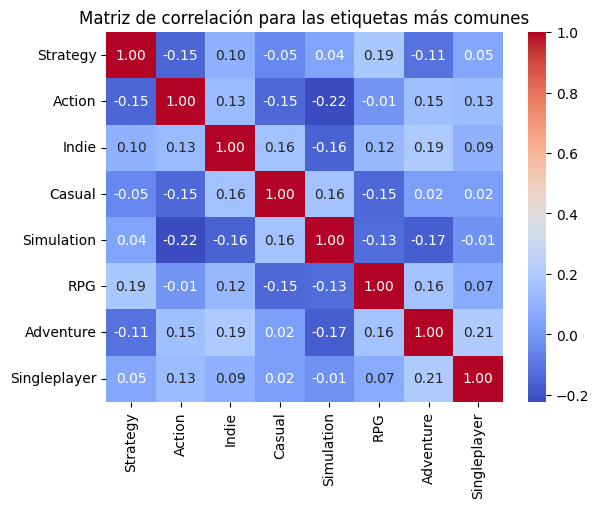

In [40]:
correlacion = games_filtered[common_tags.tolist()].corr()

# Create a heatmap
sns.heatmap(correlacion, cmap='coolwarm', annot=True, fmt=".2f")

# Set title and display the plot
plt.title('Matriz de correlación para las etiquetas más comunes')

**Como se ve no hay correlación entre ellas. Esto es bueno, ya que estas etiquetas nos sirven como "diferenciadores" de los juegos.**

**Genero un dataframe con los juegos que tienen reviews. Pongo la cantidad de reviews, el promedio de recomendación (1= siempre recomendado, 0 = nunca recomendado) y el promedio de análisis de sentimiento (2=bueno, 1 = regular, 0 = malo)**

In [41]:
df_final = pd.merge(games_filtered, merged_df, left_on= 'id', right_on = 'item_id', how='outer')

In [265]:
df_final.shape #total de juegos = 32266

(32366, 15)

In [42]:
df_final[df_final['count'].isna()].shape[0] #total de juegos sin reviews.

29469

**Como se ve, la cantidad de juegos que tienen reviews es muy pequeña**

In [267]:
df_final.head()

,app_name,release_date,id,Strategy,Action,Indie,Casual,Simulation,RPG,Adventure,Singleplayer,item_id,count,recommend,sentiment_analysis
0,Counter-Strike,2000.0,10.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,50.0,0.980000,1.120000
1,Team Fortress Classic,1999.0,20.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,20.0,15.0,0.666667,1.133333
2,Day of Defeat,2003.0,30.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,30.0,4.0,0.750000,1.000000
3,Deathmatch Classic,2001.0,40.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,40.0,1.0,1.000000,1.000000
4,Half-Life: Opposing Force,1999.0,50.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,50.0,4.0,0.750000,1.000000


**Vamos a graficar la recomendación (1= siempre recomendada, 0=nunca recomendada) en función del año de lanzamiento**

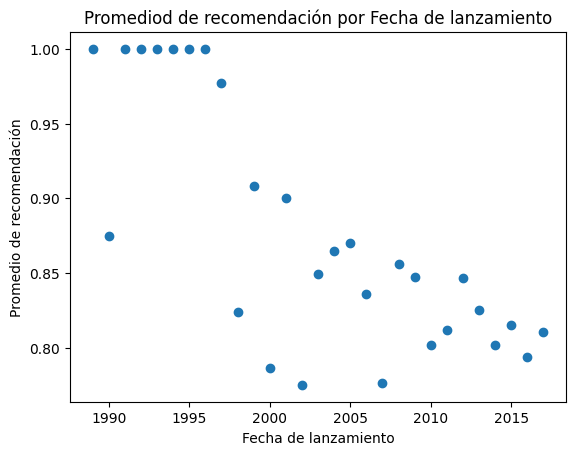

In [44]:
recommend_by_year = df_final.groupby('release_date')['recommend'].mean().sort_values()

plt.scatter(recommend_by_year.index, recommend_by_year.values,)

# Set labels and title
plt.xlabel('Fecha de lanzamiento')
plt.ylabel('Promedio de recomendación')
plt.title('Promediod de recomendación por Fecha de lanzamiento')

# Show plot
plt.show()


**Vamos a graficar la cantidad de reviews en función del año de lanzamiento**

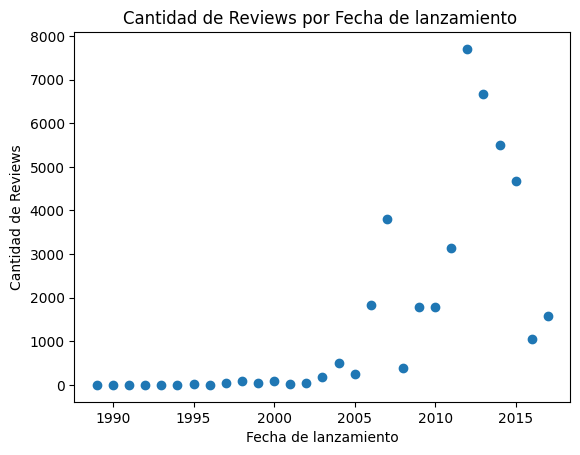

In [221]:
recommendations_by_year = df_final.groupby('release_date')['count'].sum().sort_values()

plt.scatter(recommendations_by_year.index, recommendations_by_year.values)

# Set labels and title
plt.xlabel('Fecha de lanzamiento')
plt.ylabel('Cantidad de Reviews')
plt.title('Cantidad de Reviews por Fecha de lanzamiento ')

# Show plot
plt.show()

**Vemos que los juegos más viejos fueron poco recomendados, pero a la vez, los que son recomendados son siempre bien recomendados**

**Análisis de sentimiento (0=malo, 1= regular, 2=bueno) en función de la cantidad de reviews**

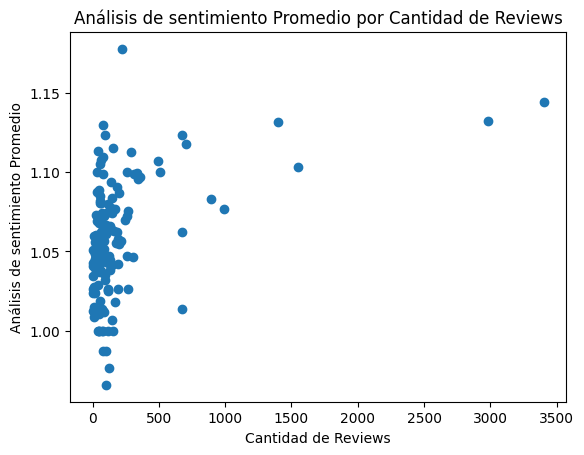

In [222]:
recommendations_by_year = df_final.groupby('count')['sentiment_analysis'].mean().sort_values()

plt.scatter(recommendations_by_year.index, recommendations_by_year.values)

# Set labels and title
plt.xlabel('Cantidad de Reviews')
plt.ylabel('Análisis de sentimiento Promedio')
plt.title('Análisis de sentimiento Promedio por Cantidad de Reviews')

# Show plot
plt.show()

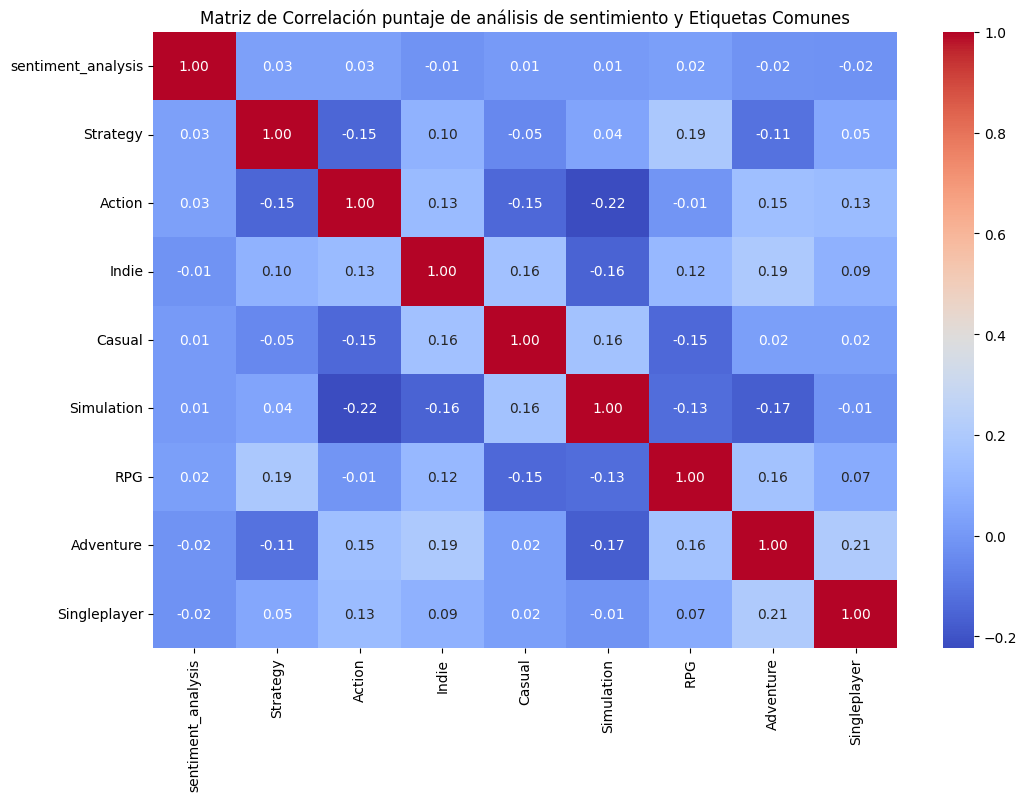

In [83]:
correlation_matrix = df_final[['sentiment_analysis'] + common_tags.tolist()].corr()

# Crear un mapa de calor (heatmap)
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=True, fmt=".2f")

# Establecer título
plt.title('Matriz de Correlación puntaje de análisis de sentimiento y Etiquetas Comunes')

# Mostrar el mapa de calor
plt.show()

**Vemos que no hay correlación entre algún género y el análisis de sentimiento. No hay un género que "guste más" o "guste menos"**

In [49]:
horas_de_juego = pd.read_csv('archivos_csv\items_final_pulido.csv')

<>:1: SyntaxWarning: invalid escape sequence '\i'
<>:1: SyntaxWarning: invalid escape sequence '\i'
C:\Users\torin\AppData\Local\Temp\ipykernel_20396\2433128278.py:1: SyntaxWarning: invalid escape sequence '\i'
  horas_de_juego = pd.read_csv('archivos_csv\items_final_pulido.csv')


**Calculamos las horas jugadas totales por juego**

In [51]:
horas_por_juego = horas_de_juego.groupby('item_id')['playtime_forever'].sum().reset_index(name='horas_jugadas')

In [54]:
horas_por_juego.sort_values(by= 'horas_jugadas', ascending=False)

,item_id,horas_jugadas
23,730,265689.750000
154,4000,126377.983333
1340,72850,75607.966667
1930,218620,71047.833333
2160,230410,64322.633333
...,...,...
1973,220824,0.016667
4677,330000,0.016667
4666,329630,0.016667
7491,431330,0.016667


In [55]:
horas_por_juego.horas_jugadas.describe()

count      8647.000000
mean        424.201461
std        3971.977354
min           0.016667
25%           4.700000
50%          35.916667
75%         136.325000
max      265689.750000
Name: horas_jugadas, dtype: float64

**Como se ve la mayoría de los juegos tienen un promedio pequeña de horas judagas y el último cuartil tiene muchos outliers. Imaginamos que son los juegos records, que jugaron casi todos los jugadores y durante mucho tiempo**

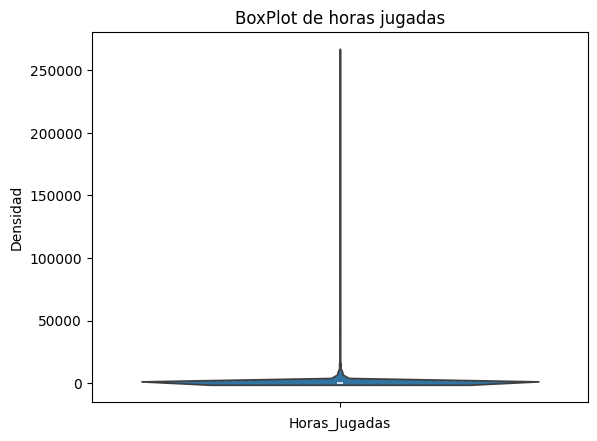

In [57]:
# Create a violin plot
sns.violinplot(y=horas_por_juego['horas_jugadas'])

# Set labels and title
plt.xlabel('Horas_Jugadas')
plt.ylabel('Densidad')
plt.title('BoxPlot de horas jugadas')

# Show plot
plt.show()

**Vamos a hacer lo mismo pero separando el último cuartil**

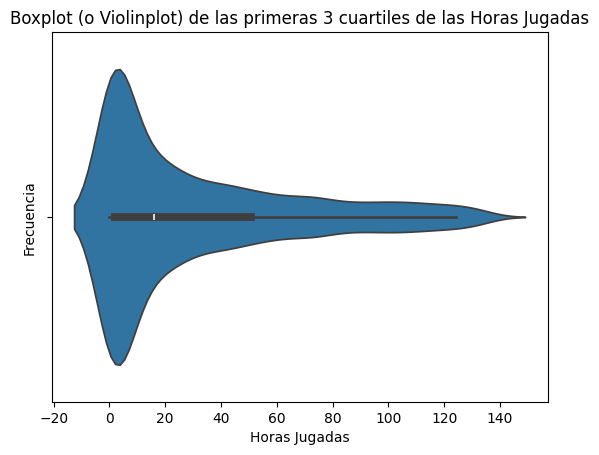

In [60]:
third_quartile = horas_por_juego['horas_jugadas'].quantile(0.75)

# Filtrar los datos por debajo del tercer cuartil
filtered_data = horas_por_juego[horas_por_juego['horas_jugadas'] <= third_quartile]

# Crear un boxplot o violinplot con los datos filtrados

#sns.boxplot(x=filtered_data['horas_jugadas'])  # Para un boxplot
sns.violinplot(x=filtered_data['horas_jugadas'])  # Para un violinplot

# Establecer etiquetas y título
plt.xlabel('Horas Jugadas')
plt.ylabel('Frecuencia')
plt.title('Boxplot (o Violinplot) de las primeras 3 cuartiles de las Horas Jugadas')

# Mostrar el gráfico
plt.show()

**Y ahora para el último cuartil**

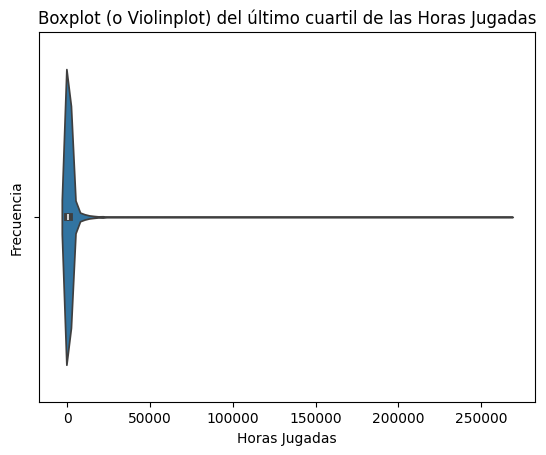

In [61]:
third_quartile = horas_por_juego['horas_jugadas'].quantile(0.75)

# Filtrar los datos por debajo del tercer cuartil
filtered_data = horas_por_juego[horas_por_juego['horas_jugadas'] > third_quartile]

# Crear un boxplot o violinplot con los datos filtrados

#sns.boxplot(x=filtered_data['horas_jugadas'])  # Para un boxplot
sns.violinplot(x=filtered_data['horas_jugadas'])  # Para un violinplot

# Establecer etiquetas y título
plt.xlabel('Horas Jugadas')
plt.ylabel('Frecuencia')
plt.title('Boxplot (o Violinplot) del último cuartil de las Horas Jugadas')

# Mostrar el gráfico
plt.show()

**Vamos a combinar ahora las horas jugadas con el df previo y ver que relaciones podemos encontrar**

In [66]:
df_final.head(1)

,app_name,release_date,id,Strategy,Action,Indie,Casual,Simulation,RPG,Adventure,Singleplayer,item_id,count,recommend,sentiment_analysis
0,Counter-Strike,2000.0,10.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,50.0,0.98,1.12


In [87]:
reviews_y_horas = pd.merge(horas_por_juego, df_final, left_on='item_id', right_on='id', how= 'outer') 
#outer para quedarme con todos los juegos, incluso los que no tienen horas jugadas

reviews_y_horas.drop(columns=['item_id_y'], inplace=True)
reviews_y_horas.rename(columns={'item_id_x': 'id'}, inplace=True)
# Eliminar una de las columnas que se utilizaron para la fusión

In [73]:
reviews_y_horas.horas_jugadas.isna().value_counts() #cantidad de juegos sin horas jugadas.

horas_jugadas
True     24923
False     8647
Name: count, dtype: int64

In [88]:
reviews_y_horas.head()

,id,horas_jugadas,app_name,release_date,Strategy,Action,Indie,Casual,Simulation,RPG,Adventure,Singleplayer,count,recommend,sentiment_analysis
0,10.0,18546.733333,Counter-Strike,2000.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,50.0,0.980000,1.120000
1,20.0,2052.200000,Team Fortress Classic,1999.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,15.0,0.666667,1.133333
2,30.0,2171.750000,Day of Defeat,2003.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,4.0,0.750000,1.000000
3,40.0,34.966667,Deathmatch Classic,2001.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.000000,1.000000
4,50.0,623.133333,Half-Life: Opposing Force,1999.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,4.0,0.750000,1.000000


**Buscamos correlaciones entre las variables**

In [77]:
reviews_y_horas[['horas_jugadas', 'count', 'recommend', 'sentiment_analysis']].corr()

,horas_jugadas,count,recommend,sentiment_analysis
horas_jugadas,1.000000,0.913324,0.049538,0.039577
count,0.913324,1.000000,0.042636,0.030516
recommend,0.049538,0.042636,1.000000,0.175299
sentiment_analysis,0.039577,0.030516,0.175299,1.000000


**Los juegos que más se jugaron son los que más veces se comentaron, tiene sentido**

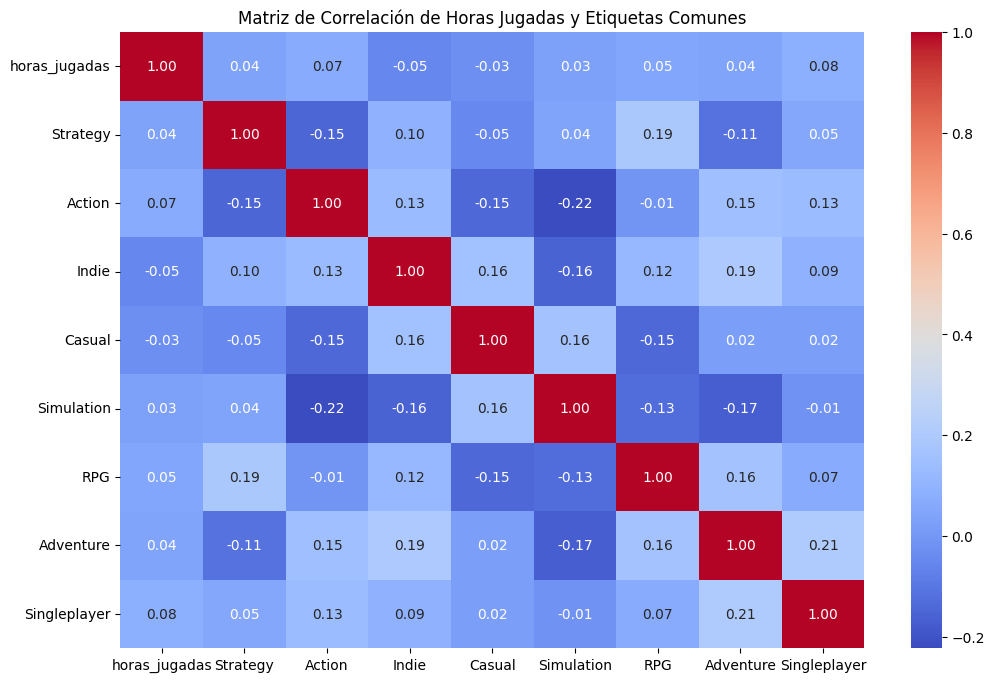

In [82]:
correlation_matrix = reviews_y_horas[['horas_jugadas'] + common_tags.tolist()].corr()

# Crear un mapa de calor (heatmap)
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=True, fmt=".2f")

# Establecer título
plt.title('Matriz de Correlación de Horas Jugadas y Etiquetas Comunes')

# Mostrar el mapa de calor
plt.show()

**No hay correlación entre las horas jugadas y un género en particular. No hay ningún género que "se juegue más" o "se juegue menos"**

In [89]:
#vamos a exportar este último dataframe para el modelo de Machine Learning
reviews_y_horas.to_csv('archivos_csv/data_para_ML.csv', index=False)